## Draw with College Data

##### Datasource
Source Doc: https://collegescorecard.ed.gov/data/documentation/  
API github: https://github.com/18F/open-data-maker/blob/api-docs/API.md  
API schema: https://docs.google.com/spreadsheets/d/15aZ1m6eg_GRK0FwGVYN2TKp9vF5rE9V3JwT1QhD0uJs/pubhtml

## Now, here are a few cool things you can see with this data

In [4]:
HTML(map_css() + """
<div id='completion_rate'><h3></h3></div>
<div id='white_student'><h3></h3></div>
""")

In [2]:
# init
# import requirement
import pandas as pd
import numpy as np
from IPython.display import Javascript, HTML

# visual
import mpld3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpld3.enable_notebook()

# import dependency
from dep import *
api_key = get_api_key()

In [5]:
# pull data
# save data to local hdf
# pull([2008,2009,2010,2011,2012,2013])
# pull([2013], api_key)

# read data from local hdf
yr_2013 = pd.read_hdf('d.h', 'yr_2013')
geo = pd.read_hdf('d.h', 'geo')

# columns
HTML(pd.DataFrame(yr_2013.columns).to_html())

,0
0,2013.academics.program_percentage.agriculture
1,2013.academics.program_percentage.architecture
2,2013.academics.program_percentage.biological
3,2013.academics.program_percentage.business_mar...
4,2013.academics.program_percentage.communication
5,2013.academics.program_percentage.communicatio...
6,2013.academics.program_percentage.computer
7,2013.academics.program_percentage.construction
8,2013.academics.program_percentage.education
9,2013.academics.program_percentage.engineering


In [6]:
# select query
d_2013 = yr_2013[[  'id',
                    'school.name', 'school.operating', 'school.locale', 'school.ownership','school.zip',
                    '2013.student.size',
                    '2013.cost.avg_net_price.private', '2013.cost.avg_net_price.public',
                    '2013.admissions.admission_rate.by_ope_id',
                    '2013.admissions.admission_rate.overall',
                    '2013.admissions.sat_scores.average.by_ope_id',
                    '2013.admissions.sat_scores.average.overall',
                    '2013.cost.attendance.academic_year',
                    '2013.cost.attendance.program_year',
                    '2013.cost.avg_net_price.public',
                    '2013.cost.tuition.in_state',
                    '2013.cost.tuition.out_of_state',
                    '2013.completion.completion_rate_4yr_150nt',
                    '2013.completion.completion_rate_4yr_150nt_pooled',
                    '2013.completion.completion_rate_less_than_4yr_150nt',
                    '2013.completion.completion_rate_less_than_4yr_150nt_pooled',
                    '2013.completion.completion_rate_4yr_150_asian',
                    '2013.completion.completion_rate_4yr_150_black',
                    '2013.completion.completion_rate_4yr_150_hispanic',
                    '2013.completion.completion_rate_4yr_150_white',
                    '2013.student.demographics.race_ethnicity.asian',
                    '2013.student.demographics.race_ethnicity.black',
                    '2013.student.demographics.race_ethnicity.hispanic',
                    '2013.student.demographics.race_ethnicity.non_resident_alien',
                    '2013.student.demographics.race_ethnicity.white',
                    '2013.earnings.10_yrs_after_entry.median',
                    '2013.earnings.6_yrs_after_entry.median',
                    '2013.earnings.8_yrs_after_entry.median_earnings'
                 ]]

# just looking at 'operating school'
d_2013 = d_2013[d_2013['school.operating'] == 1]

# show # null value of each field
HTML(pd.DataFrame(np.sum(d_2013.isnull(), axis=0)/d_2013.shape[0]).to_html())

,0
id,0.000000
school.name,0.000000
school.operating,0.000000
school.locale,0.051587
school.ownership,0.000000
school.zip,0.000000
2013.student.size,0.088944
2013.cost.avg_net_price.private,0.399015
2013.cost.avg_net_price.public,0.739737
2013.admissions.admission_rate.by_ope_id,0.669267


In [7]:
# take a look at my school
# print(d_2013[d_2013['school.name'].str.contains('Syracuse University', na=False)].transpose())
HTML(d_2013[d_2013['school.name'].str.contains('Georgia Institute of Technology', na=False)].transpose().to_html())

,12
id,139755
school.name,Georgia Institute of Technology-Main Campus
school.operating,1
school.locale,11
school.ownership,1
school.zip,30332
2013.student.size,13975
2013.cost.avg_net_price.private,NaN
2013.cost.avg_net_price.public,11053
2013.admissions.admission_rate.by_ope_id,0.5493


#### Geo Visualization on Student Demographics

In [9]:
Javascript(d3_choropleth_generator(d_2013, geo, '2013.student.demographics.race_ethnicity.white', np.mean, '2013 White Student Ratio', 'white_student'))
Javascript(d3_choropleth_generator(d_2013, geo, '2013.completion.completion_rate_4yr_150nt', np.mean, '2013 Mean Completion Rate', 'completion_rate'))

<IPython.core.display.Javascript object>

#### Now, it would be interesting to see overall completion rate can be correlated with student ratio by different races

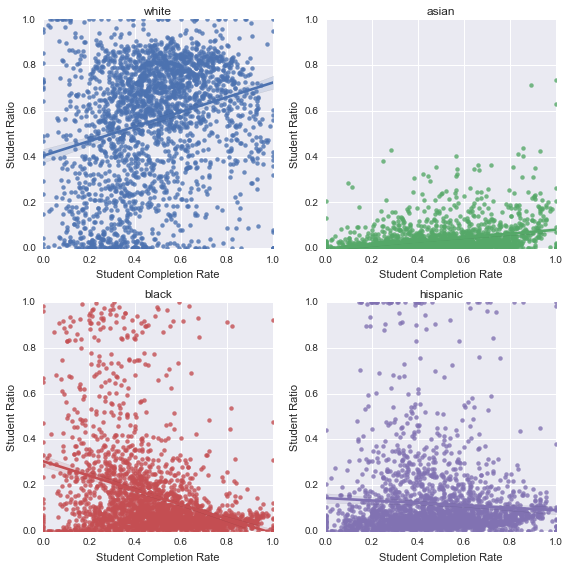

In [10]:
f, ax_i = plt.subplots(2,2, figsize=(8,8))

x = d_2013['2013.completion.completion_rate_4yr_150nt']

def draw(ax, x, y):
    sns.regplot(x=x, y=d_2013['2013.student.demographics.race_ethnicity.%s'%y], ax=ax)
    ax.set_xlim(0,1); ax.set_ylim(0,1);
    ax.set_title(y);
    ax.set_xlabel('Student Completion Rate');
    ax.set_ylabel('Student Ratio');

axes = [ax_i[0][0], ax_i[0][1], ax_i[1][0], ax_i[1][1]]
races = ['white', 'asian', 'black', 'hispanic']

for i in range(4):
    draw(axes[i], x, races[i])

f.tight_layout();